<a href="https://colab.research.google.com/github/gsgh3016/Pytorch-study/blob/main/Gamchan/chap06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 머신 러닝 용어 이해하기


## 1-1 머신 러닝 모델의 평가

### 하이퍼파라미터 vs 매개변수
* 하이퍼파라미터: 사용자가 정할 수 있는 값
* 매개변수: 모델이 학습하는 값
* 검증용 데이터로 정확도에 따라 *하이퍼파라미터 튜닝* &rarr; 검증용 데이터에 점점 맞춰감
* 모델 검중: 사용하지 않은 데이터로 하는 것이 바람직 함
* 훈련 데이터: 문제지
* 검증 데이터: 모의고사
* 테스트 데이터: 수능 시험


## 1-2 분류와 회귀

### 1) 이진 분류 문제
* 선택지가 2개

### 2) 다중 클래스 분류
* 선택지가 여러 개

### 3) 회귀 문제
* 연속된 값이 결과로 나오는 문제

## 1-3 지도 학습 vs 비지도 학습

### 1) 지도 학습
* 정답(레이블, y, 실제값)과 함께 학습

### 2) 비지도 학습
* 목적 데이터 없이 학습 ex) 군집, 차원 축소

### 3) 강화 학습
* 현재 상태 인식(에이전트) -> 보상을 최대화하는 행동, 행동 순서를 선택

## 1-4 샘플과 특성
* 데이터의 행: 샘플
* 데이터의 열: 특성

## 1-5 혼동 행렬
* 정확도 -> 맞춘 결과, 틀린 결과 세부 내용을 알지 X
* 정밀도: $\frac{TP}{TP + FP}$
* 재현률: $\frac{TP}{TP + FN}$

## 1-6 과적합과 과소 적합

* 과적합: 훈련 데이터를 과하게 학습한 경우 &rarr; 테스트 데이터에 대해 오차가 높아짐
* 과소적합: 훈련이 부족한 상태

# 2. 퍼셉트론

## 2-1 퍼셉트론

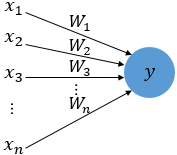
* 로지스틱 회귀 모델 &rarr; 인공 신경망에서 하나의 인공 뉴런
* 퍼셉트론: 활성화 함수가 계단 함수이 인공 뉴런

## 2-2 단층 퍼셉트론
* 값을 보내는 단계(입력 층) / 값을 출력하는 단계(출력 층)<br>
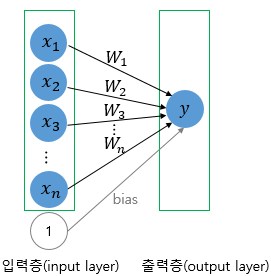
* AND, OR, NAND, NOR 등 선형 논리 연산 가능
* AND<br>
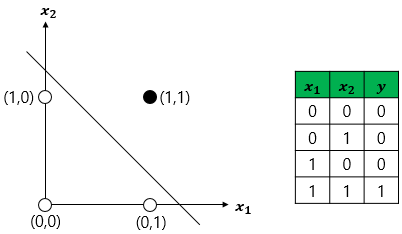
* OR & NAND<br>
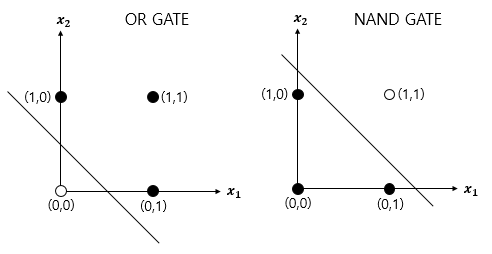

## 2-3 다층 퍼셉트론
* 입력층, 출력층 사이에 다른 층(은닉층)이 존재<br>
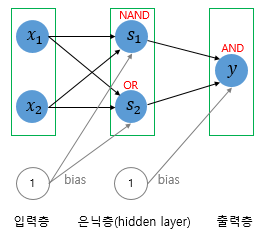
* 은닉층이 2개 이상인 신경망: 심층 신경망
* 가중치를 찾는 자동화 단계: 학습 &rarr; 손실 함수와 옵티마이저 사용
* 옵티마이저<br>
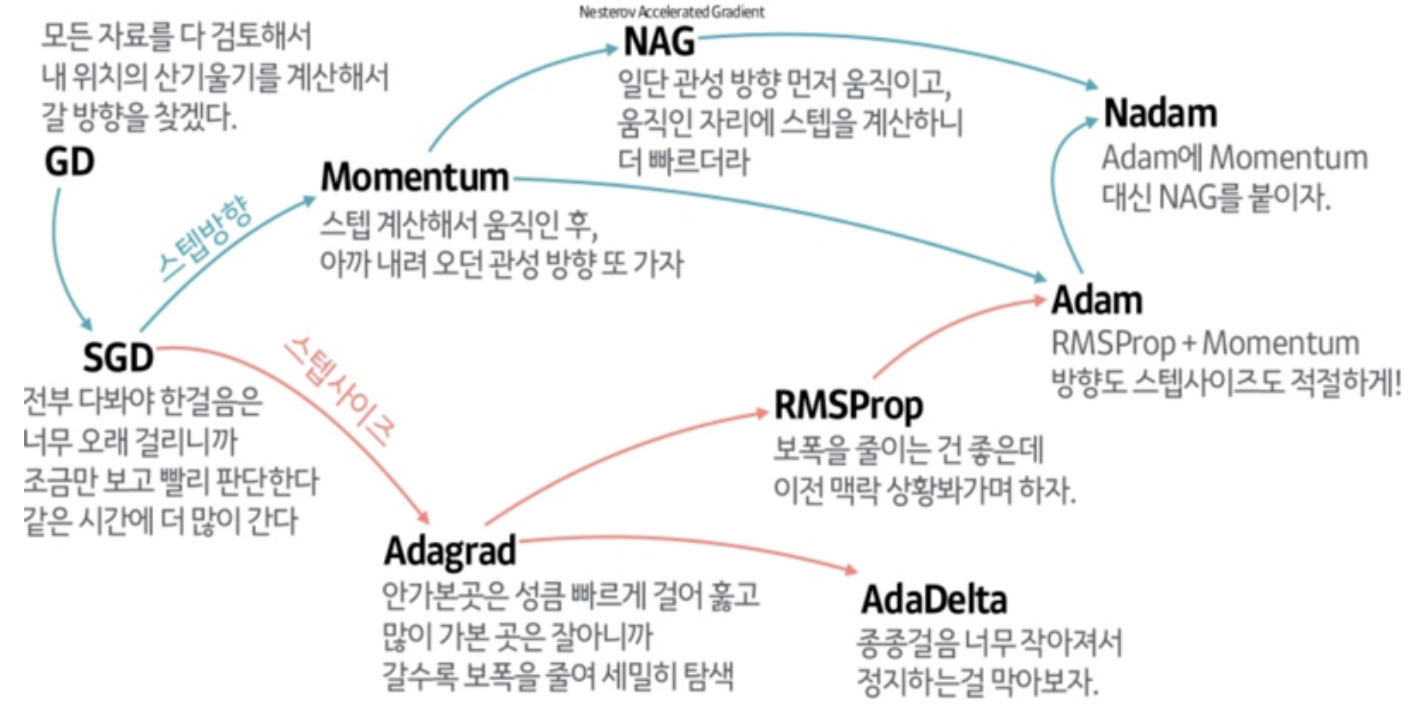

# 3. XOR 문제 - 단층 퍼셉트론 구현하기

## 3-1 파이토치로 단층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [ ]:
criterion = torch.nn.BCELoss().to(device) # Binary Cross-Entropy Loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(f"Step: {step:05d}, Cost: {cost.item():.10f}")

Step: 00000, Cost: 0.6931471825
Step: 00100, Cost: 0.6931471825
Step: 00200, Cost: 0.6931471825
Step: 00300, Cost: 0.6931471825
Step: 00400, Cost: 0.6931471825
Step: 00500, Cost: 0.6931471825
Step: 00600, Cost: 0.6931471825
Step: 00700, Cost: 0.6931471825
Step: 00800, Cost: 0.6931471825
Step: 00900, Cost: 0.6931471825
Step: 01000, Cost: 0.6931471825
Step: 01100, Cost: 0.6931471825
Step: 01200, Cost: 0.6931471825
Step: 01300, Cost: 0.6931471825
Step: 01400, Cost: 0.6931471825
Step: 01500, Cost: 0.6931471825
Step: 01600, Cost: 0.6931471825
Step: 01700, Cost: 0.6931471825
Step: 01800, Cost: 0.6931471825
Step: 01900, Cost: 0.6931471825
Step: 02000, Cost: 0.6931471825
Step: 02100, Cost: 0.6931471825
Step: 02200, Cost: 0.6931471825
Step: 02300, Cost: 0.6931471825
Step: 02400, Cost: 0.6931471825
Step: 02500, Cost: 0.6931471825
Step: 02600, Cost: 0.6931471825
Step: 02700, Cost: 0.6931471825
Step: 02800, Cost: 0.6931471825
Step: 02900, Cost: 0.6931471825
Step: 03000, Cost: 0.6931471825
Step: 03

## 3-2 학습된 단층 퍼셉트론의 예측값 확인

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print(f"Hypothesis: {hypothesis.detach().cpu().numpy()}\nPredicted: {predicted.detach().cpu().numpy()}\nY: {Y.cpu().numpy()}\nAccuracy: {accuracy.item()}\n")

Hypothesis: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Predicted: [[0.]
 [0.]
 [0.]
 [0.]]
Y: [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 0.5



# 4. 역전파

## 4-1 인공 신경망의 이해
* z: 활성화 함수 거치기 전, h: 활성화 함수 거친 다음(은닉층 출력)<br>
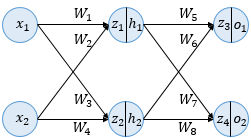


## 4-2 순전파
* 인공 신경망에 최초 입력값을 넣고 최종 출력값(예측값)과 이론값의 오차(MSE)를 구함<br>
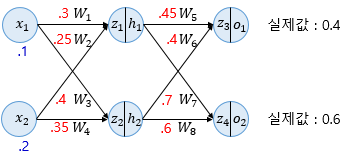

## 4-3 역전파 1단계
* 손실 함수/최종 예측값 x 최종 예측값/활성화 함수 거치기 전 값 x 활성화 함수 거치기 전 값/가중치<br>
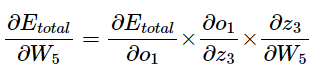

## 4-2 역전파 2단계
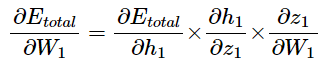
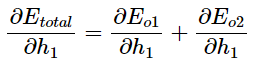
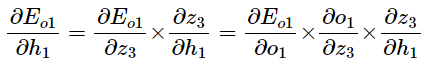
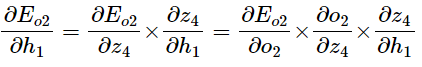
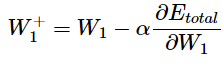

인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복

# 5. XOR 문제 - 다층 퍼셉트론 구현하기

## 5-1 파이토치로 다층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

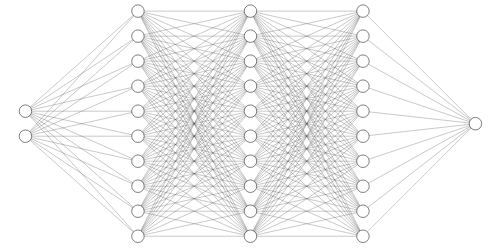

In [ ]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch:05d}/10000, Cost: {cost.item()}")

Epoch: 00000/10000, Cost: 0.6948983669281006
Epoch: 00100/10000, Cost: 0.693155825138092
Epoch: 00200/10000, Cost: 0.6931535005569458
Epoch: 00300/10000, Cost: 0.6931513547897339
Epoch: 00400/10000, Cost: 0.6931492686271667
Epoch: 00500/10000, Cost: 0.6931473016738892
Epoch: 00600/10000, Cost: 0.6931453943252563
Epoch: 00700/10000, Cost: 0.6931434869766235
Epoch: 00800/10000, Cost: 0.6931416392326355
Epoch: 00900/10000, Cost: 0.6931397914886475
Epoch: 01000/10000, Cost: 0.6931380033493042
Epoch: 01100/10000, Cost: 0.6931362152099609
Epoch: 01200/10000, Cost: 0.6931343078613281
Epoch: 01300/10000, Cost: 0.6931324005126953
Epoch: 01400/10000, Cost: 0.6931304931640625
Epoch: 01500/10000, Cost: 0.6931284666061401
Epoch: 01600/10000, Cost: 0.6931264400482178
Epoch: 01700/10000, Cost: 0.6931242942810059
Epoch: 01800/10000, Cost: 0.6931220293045044
Epoch: 01900/10000, Cost: 0.6931196451187134
Epoch: 02000/10000, Cost: 0.6931171417236328
Epoch: 02100/10000, Cost: 0.6931145191192627
Epoch: 0220

## 5-2 학습된 다층 퍼셉트론의 예측값 확인하기

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > .5).float()
    accuracy = (predicted == Y).float().mean()
    print(f"Hypothesis: {hypothesis.detach().cpu().numpy()}")   # 모델에 X를 넣은 결과 -> computation graph와 연관됨 -> 연관성을 떼어내(detach) 값만 봄
    print(f"Predicted: {predicted.detach().cpu().numpy()}")     # 같은 이유
    print(f"Y: {Y.cpu().numpy()}")
    print(f"accuracy: {accuracy.item()}")

Hypothesis: [[1.1169227e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8534942e-04]]
Predicted: [[0.]
 [1.]
 [1.]
 [0.]]
Y: [[0.]
 [1.]
 [1.]
 [0.]]
accuracy: 1.0


# 6. 비선형 활성화 함수

* 인공 신경망의 은닉층에서 시그모이드 함수를 활성화 함수로 사용하는 것을 지양해야 함 &rarr; 그 대신 ReLU

## 6-1 활성화 함수의 특징 - 비선형 함수
* 선형일 경우 계속 층을 더해도 선형 함수가 됨 &rarr; 1개의 층와 N개의 층 구분 X

## 6-2 시그모이드 함수와 기울기 소실

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

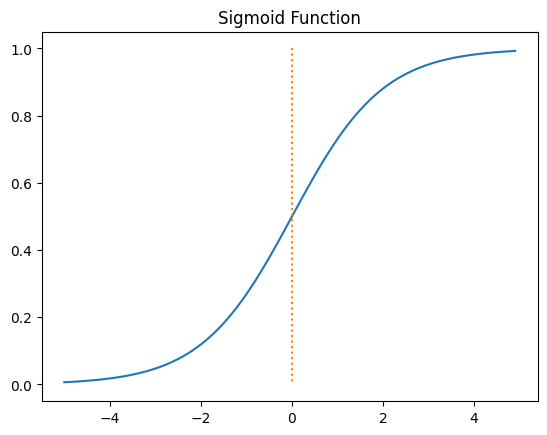

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5., 5., .1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1., .0], ":")
plt.title("Sigmoid Function")
plt.show()

0에서 멀어지면 기울기가 아주 작은 값이 나옴 &rarr; 역전파 과정에서 앞단에 기울기 전달 X &rarr; 기울기 소실 문제

## 6-3 하이퍼볼릭탄젠트 함수

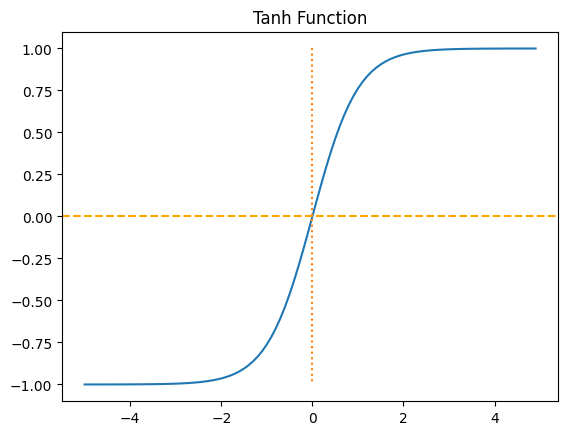

In [ ]:
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1., -1.], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title("Tanh Function")
plt.show()

## 6-4 ReLU 함수

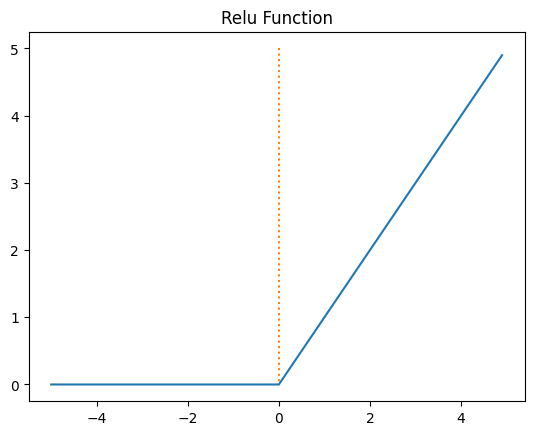

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5., 5., .1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5., .0], ':')
plt.title('Relu Function')
plt.show()

* 수렴하지 않아 더 잘 작동
* 단순 임계값 &rarr; 빠른 연산
* 입력이 음수면 기울기도 0 &rarr; 죽은 ReLU 문제

## 6-5 Leaky ReLU

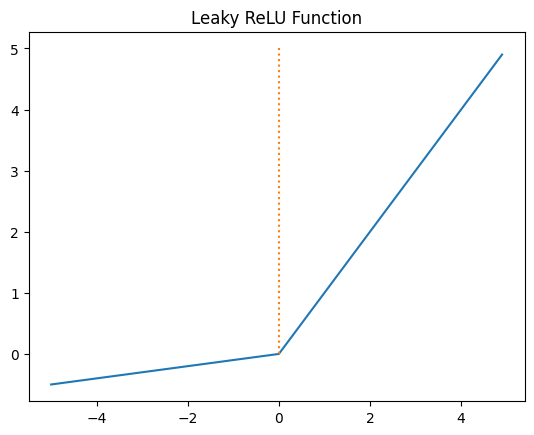

In [ ]:
a = .1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5., 5., .1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5., .0], ":")
plt.title("Leaky ReLU Function")
plt.show()

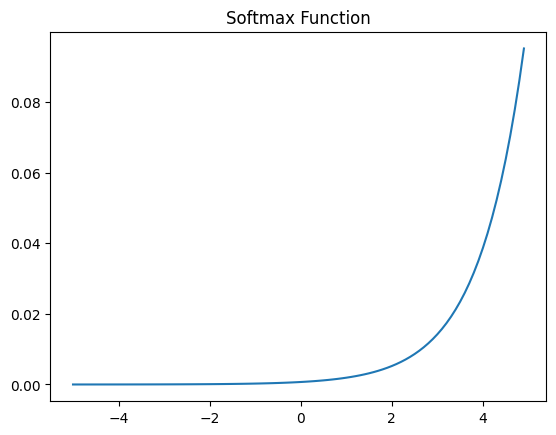

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 6-7 활성화 함수와 오차 함수의 관계
|문제|활성화 함수|비용 함수|
|-|-|-|
|이진 분류|시그모이드|nn.BCELoss()|
|다중 클래스 분류|소프트맥스|nn.CrossEntropyLoss() (*소프트맥스 함수 이미 내포)|
|회귀|없음|MSE|

\* 시그모이드 함수: 입력의 가중치 합 < 출력의 가중치 합 &rarr; 편향 이동 문제<br>
\* 하이퍼볼릭탄젠트 함수: 기울기 소실 문제
\* cs231n에서 ReLU 시도 &rarr; LeakyReLU 같은 변형 ReLU 시도, 시그모이드 X

# 7. 다층 퍼셉트론으로 손글씨 분류하기

## 7-1 숫자 필기 데이터 소개

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(digits.target[0])

0


In [ ]:
print("# of total samples: " + str(len(digits.images)))

# of total samples: 1797


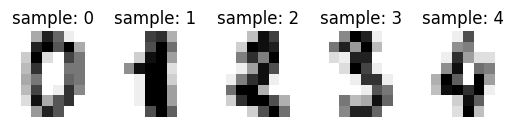

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (images, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(images, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"sample: {label}")

In [ ]:
for i in range(5):
    print(f"{i} 번 인덱스 샘플의 레이블: {digits.target[i]}")

0 번 인덱스 샘플의 레이블: 0
1 번 인덱스 샘플의 레이블: 1
2 번 인덱스 샘플의 레이블: 2
3 번 인덱스 샘플의 레이블: 3
4 번 인덱스 샘플의 레이블: 4


In [ ]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data
Y = digits.target

## 7-2 다층 퍼셉트론 분류기 만들기

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
losses = []

In [ ]:
for epoch in range(101):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch : {epoch:03d}/100 Cost:{loss.item():.6f}")

    losses.append(loss.item())

Epoch : 000/100 Cost:2.411062
Epoch : 010/100 Cost:2.049829
Epoch : 020/100 Cost:1.698586
Epoch : 030/100 Cost:1.306123
Epoch : 040/100 Cost:0.906177
Epoch : 050/100 Cost:0.599814
Epoch : 060/100 Cost:0.414528
Epoch : 070/100 Cost:0.304954
Epoch : 080/100 Cost:0.239450
Epoch : 090/100 Cost:0.196603
Epoch : 100/100 Cost:0.166631


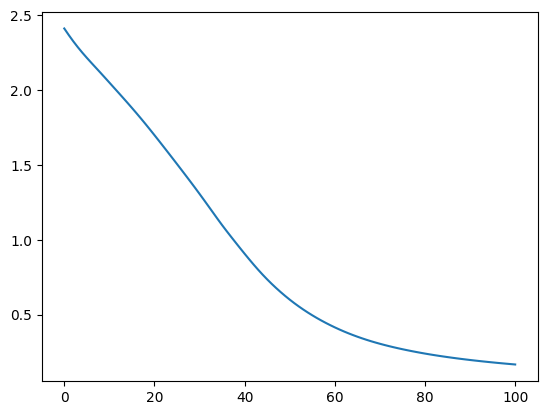

In [ ]:
plt.plot(losses)

# 8. 다층 퍼셉트론으로 MNIST 분류하기

## 8-1 데이터 로드하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
mnist.target[0]

'5'

In [ ]:
mnist.target = mnist.target.astype(np.int8)

In [ ]:
X = mnist.data / 255    # 0 ~ 255 값을 normalize
Y = mnist.target

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
Y[0]

5

이 이미지 데이터의 레이블은 5이다


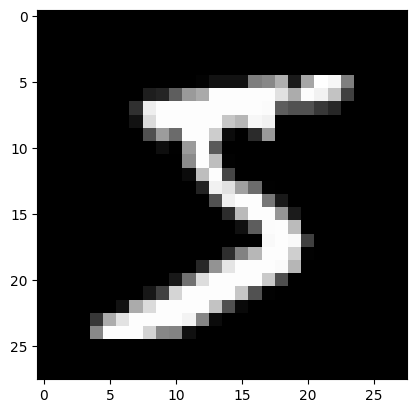

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print(f"이 이미지 데이터의 레이블은 {Y[0]}이다")

## 8-2 훈련 데이터와 테스트 데이터의 분리

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/7, random_state=0)
x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## 8-3 다층 퍼셉트론

In [ ]:
from torch import nn

In [ ]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1 ,100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)

In [ ]:
def train(epoch):
    model.train()                           # 신경망을 학습 모드로 전환

    for data, targets in loader_train:
        data = data.float()
        targets = targets.long()
        optimizer.zero_grad()
        outputs = model(data)               # 데이터를 모델에 입력하고 출력
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch} 완료")

In [ ]:
def test():
    model.eval()                            # 신경망을 추론 모드로 전환
    correct = 0

    with torch.no_grad():
        for data, targets in loader_test:
            data = data.float()
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()      # 정답과 일치한 경우 카운트

    data_num = len(loader_test.dataset)
    print(f"테스트 데이터에서 예측 정확도: {correct}/{data_num} = {correct/data_num * 100:.2f}%")

In [ ]:
test()

테스트 데이터에서 예측 정확도: 981/10000 = 9.81%


In [ ]:
for epoch in range(3):
    train(epoch)

test()

Epoch 0 완료
Epoch 1 완료
Epoch 2 완료
테스트 데이터에서 예측 정확도: 9586/10000 = 95.86%


예측 결과: 2
이 이미지 데이터의 정답 레이블은 2 입니다.


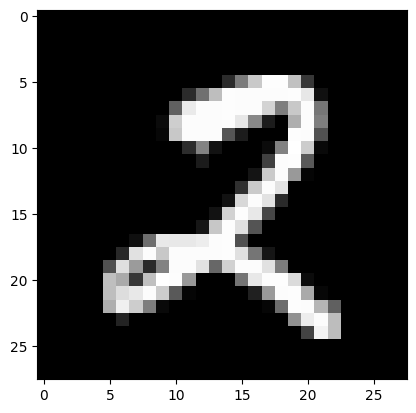

In [ ]:
index = 2018

model.eval()
data = x_test[index]
data = data.float()
output = model(data)
_, predicted = torch.max(output.data, 0)

print(f"예측 결과: {predicted}")

x_test_show = (x_test[index]).numpy()
plt.imshow(x_test_show.reshape(28, 28), cmap='gray')
print(f"이 이미지 데이터의 정답 레이블은 {y_test[index]} 입니다.")

# 9. 과적합을 막는 방법들

## 9-1 데이터 양 늘리기
* Data Augmentation: 기존 데이터를 조금씩 변형 및 추가

## 9-2 모델 복잡도 줄이기
* 인공 신경망의 복잡도: 은닉층의 수 or 매개변수의 수
* 매개변수의 수: 모델의 수용력(capacity)

## 9-3 가중치 규제(Regulation) 적용
* L1 규제: 가중치의 절대값 합(택시 거리)<br>
    특성이 모델에 미치는 정확한 영향
* L2 규제: 가중치의 제곱합
    가중치 감쇠(0에 가까워지지만 0이 되지는 않음)
```python
optimizer = torch.optim.Adam(model.parameters()
, lr=1e-4, weight_decay=1e-5)
```

## 9-4 드롭아웃
* 신경망의 뉴런을 일부 사용하지 않음
* 특정 조합에 쏠리는 현상 방지
* 서로 다른 신경망을 앙상블한 효과 &rarr; 과적합 방지

# 06-10 기울기 소실과 폭주
* 기울기 소실: 기울기가 점차적으로 작아지다가 업데이트가 제대로 이루지지 않는 현상
* 기울기 폭주: 기울기가 점차적으로 커지다가 비정상적으로 발산하는 현상

## 10-1. ReLU와 ReLU의 변형들
* 은닉층에서 시그모이드 사용 X
* Leaky ReLU: 죽은 ReLU 문제 해결

## 10-2 가중치 초기화
* 기울기 소실/폭주 완화

### 1) 세이비어/글로럿 초기화 (Xavier/Glorot Initialization)
* 이전 층 뉴런 개수: $n_{in}$, 다음 층 뉴런 개수: $n_{out}$
* 균등 분포 경우<br>
$W ⇒ Uniform(-\sqrt{\frac{6}{n_{in} + n_{out}}}, +\sqrt{\frac{6}{n_{in} + n_{out}}})$
* 정규 분포 경우<br>
$W ⇒ N(0, σ=\sqrt{\frac{2}{n_{in}+n_{out}}})$
* 특정 층이 주목받거나 뒤쳐지는 것 방지
* S자 형태 활성화 함수 &rarr; 좋은 성능
* ReLU에는 X

### 2) He 초기화(He initialization)
* 다음 층 뉴런 개수 반영 X
* 균등 분포 경우<br>
$W ⇒ Uniform(-\sqrt{\frac{6}{n_{in}}}, +\sqrt{\frac{6}{n_{in}}})$
* 정규 분포 경우<br>
$W ⇒ N(0, σ=\sqrt{\frac{2}{n_{in}}})$
* ReLU 계열 함수: He 초기화가 효율적


## 10-3 배치 정규화

### 1) 내부 공변량 변화: 층 별로 입력 데이터 분포가 달라지는 현상
* 딥 러닝 모델의 불안정성 &rarr; 층마다 입력의 분포가 달라지기 때문
* 공변량 변화: 훈련 데이터와 테스트 데이터의 분포가 다른 경우
* 내부 공변량 변화: 층간 입력 데이터 분포 변화

### 2) 배치 정규화
1. 미니 배치에 대한 평균 $\mu_b$와 분산 ${σ_b}^2$을 구함
2. 정규화: $x̂ = \frac{x-μ_b}{\sqrt{{σ_b}^{2} + ɛ}}$
3. 스케일 조정과 시프트: $ŷ = γx̂ + β$<br>
$γ$, $β$: 학습 대상
* S자 활성화 함수 기울기 소실 문제 개선
* 가중치 초기화에 둔감해짐
* 큰 학습률 사용 가능 &rarr; 학습 속도 개선
* 미니 배치마다 평균, 표준편차 계산 &rarr; 노이즈 효과 *드롭아웃과 함께 사용하면 좋음
* 실행 시간 느려짐

### 3) 배치 정규화의 한계

#### i. 미니 배치 크기에 의존적: 작은 배치 크기에는 잘 동작 X
#### ii. RNN에 적용 어려움: RNN은 각 시점(time step)마다 다른 통계치 &rarr; layer normalization 사용